In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import cv2
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [2]:
data = glob('./FILES/*.npy')

In [3]:
data

['./FILES\\Grid16_w64_d1_res128.npy',
 './FILES\\Grid1_w256_d3_res128.npy',
 './FILES\\Grid2_w128_d1_res128.npy',
 './FILES\\Grid32_w64_d2_res128.npy',
 './FILES\\Grid4_w128_d1_res128.npy',
 './FILES\\Grid8_w64_d2_res128.npy']

In [4]:
info = {}
for item in data:
    if len(item.split('_'))>=3:
        x = np.load(item, allow_pickle = True).item()['losses'] 
        name = item.split('.')[1].split('\\')[1]
        info[f'{name}'] = x
    else:
        x = np.load(item, allow_pickle = True)
        name = item.split('.')[0]
        info[f'{name}'] = x

In [5]:
info.keys()

dict_keys(['Grid16_w64_d1_res128', 'Grid1_w256_d3_res128', 'Grid2_w128_d1_res128', 'Grid32_w64_d2_res128', 'Grid4_w128_d1_res128', 'Grid8_w64_d2_res128'])

In [6]:
new_dc = {'Grid1_w256_d3_res128': info['Grid1_w256_d3_res128'],
        'Grid2_w128_d1_res128': info['Grid2_w128_d1_res128'],
        'Grid4_w128_d1_res128': info['Grid4_w128_d1_res128'],
        'Grid8_w64_d2_res128': info['Grid8_w64_d2_res128'],
        'Grid16_w64_d1_res128': info['Grid16_w64_d1_res128'],
        'Grid32_w64_d2_res128': info['Grid32_w64_d2_res128'],
#         'lossSIREN_main_': info['lossSIREN_main_'],
         }

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

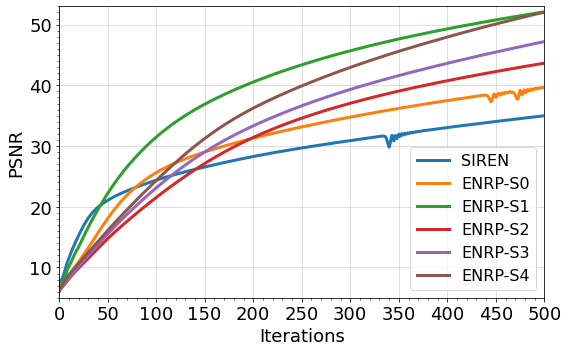

In [11]:
axis_size = 18
labelsize = 18
legsize = 16

bars = ['SIREN','ENRP-S0','ENRP-S1','ENRP-S2','ENRP-S3','ENRP-S4']

fig, ax = plt.subplots(1, 1, figsize = (8,5))

for c, bar in enumerate(new_dc.keys()):
    y = pd.DataFrame({'PSNR': 20*np.log10(1.0/np.sqrt(info[bar]))})
#     print(y['PSNR'][500])    
    try:
#         bar = bar.replace('_res128', '').replace('g', 'G')
        bar = bars[c]
    except: pass
    
#     if bar == 'Grid1_w256_d3_res128':
#         bar = 'SIREN'
# #         print(y['PSNR'][500])
    our_plot = sns.lineplot(data=y[:501], x=y.index[:501], y="PSNR", label = bar, ax = ax,linewidth=3)

our_plot.legend(prop={'size': legsize})

    
our_plot.grid(which = 'major', alpha = 0.5)


# our_plot.set_title('PSNR VS Iterations')
our_plot.xaxis.set_major_locator(MultipleLocator(50))
our_plot.yaxis.set_major_locator(MultipleLocator(10))    

our_plot.xaxis.set_minor_locator(MultipleLocator(10))
our_plot.yaxis.set_minor_locator(MultipleLocator(1))

our_plot.set_xlabel('Iterations', size = axis_size)
our_plot.set_ylabel('PSNR', size = axis_size)

plt.axis([0, 500, 5, 53])

# plt.plot((100,100), (0,80), color='black', linestyle='dashed', markersize=9)

plt.rc('xtick', labelsize=labelsize) 
plt.rc('ytick', labelsize=labelsize) 
plt.tight_layout()
plt.savefig('result3_new_iter.eps', dpi = 300)

In [52]:
images = glob('.\\images\\*')

In [53]:
images

['.\\images\\Grid16_w64_d1_res128_500.png',
 '.\\images\\Grid1_w256_d3_res128_500.png',
 '.\\images\\Grid2_w128_d1_res128_500.png',
 '.\\images\\Grid32_w64_d2_res128_500.png',
 '.\\images\\Grid4_w128_d1_res128_500.png',
 '.\\images\\Grid8_w64_d2_res128_500.png',
 '.\\images\\Image1.jpg']

In [54]:
iter = 500
add = 'images'

In [56]:
images = [f'.\\{add}\\Image1.jpg',
         f'.\\{add}\\Grid1_w256_d3_res128_{iter}.png',
         f'.\\{add}\\Grid2_w128_d1_res128_{iter}.png',
         f'.\\{add}\\Grid4_w128_d1_res128_{iter}.png',
         f'.\\{add}\\Grid8_w64_d2_res128_{iter}.png',
         f'.\\{add}\\Grid16_w64_d1_res128_{iter}.png',
         f'.\\{add}\\Grid32_w64_d2_res128_{iter}.png',
         ]


In [57]:
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
# font.set_style('italic')
font.set_weight('bold')
font.set_size(20)

font2 = FontProperties()
font2.set_family('serif')
font2.set_name('Times New Roman')
# font.set_style('italic')
# font2.set_weight('bold')
font2.set_size(20)

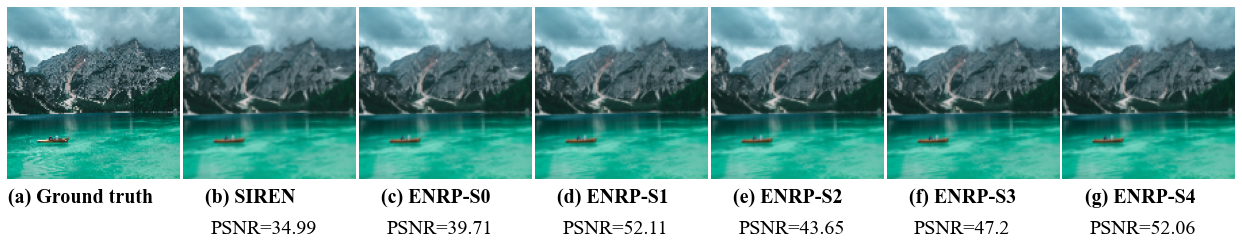

In [63]:
fig, ax = plt.subplots(1, 7, figsize = (22,6), gridspec_kw = {'wspace':0.02, 'hspace':0})

style = dict(color='black', font=font)
style2 = dict(color='black', font=font2)

psnr = ['',34.99, 39.71, 52.11, 43.65, 47.20, 52.06]
alph = ['a', 'b', 'c', 'd', 'e', 'f','g', 'h']
N = ['Ground truth','SIREN', 'ENRP-S0','ENRP-S1','ENRP-S2','ENRP-S3','ENRP-S4']

for c, img in enumerate(images):
    org = cv2.imread(img)
    if c == 0:
        org = cv2.resize(org, (128, 128))
    ax[c].imshow(org[...,::-1])
    ax[c].axis('off')
    
#     if c == 6:
#         ax[c].set_title(f'FLOPs={flps[c]}', font=font)
#         ax[c].text(0, 145, f'          {N[c]}', **style)
#         ax[c].text(0, 165, f"        w={w[c]}, d={d[c]}      ", **style)
#     elif c == 5 or c == 4:
#         ax[c].set_title(f'FLOPs={flps[c]}', font=font)
#         ax[c].text(0, 145, f'({alph[c]})        N = {N[c]}', **style)
#         ax[c].text(0, 165, f"         w={w[c]}, d={d[c]}", **style)
#     elif c == 3:
#         ax[c].set_title(f'FLOPs={flps[c]}', font=font)
#         ax[c].text(0, 145, f'({alph[c]})       N = {N[c]}', **style)
#         ax[c].text(0, 165, f"         w={w[c]}, d={d[c]}", **style)
#     else:
#     ax[c].set_title(f'FLOPs={flps[c]}', font=font)
    if c == 0:
        ax[c].text(0, 145, f'({alph[c]}) {N[c]}', **style)
        
    elif c in [1,2,3,4,5,6]:
        ax[c].text(16, 145, f'({alph[c]}) {N[c]}', **style)
        ax[c].text(20, 168, f'PSNR={psnr[c]}', **style2)
        
    else:
        ax[c].text(25, 145, f'({alph[c]}) {N[c]}', **style)
        ax[c].text(20, 168, f'PSNR={psnr[c]}', **style2)
        
#     ax[c].text(0, 165, f"          w={w[c]}, d={d[c]}", **style)

    ax[c].set_xticklabels([])
    ax[c].set_yticklabels([])
    
    
# plt.tight_layout()
# plt.show()
plt.savefig('images_MODELS.eps', dpi = 300, bbox_inches='tight', pad_inches=0)